timestamp
2016-06-01 10:00:00    1516.500
2016-06-01 11:00:00    1011.500
2016-06-01 12:00:00     489.500
2016-06-01 13:00:00      94.775
2016-06-01 14:00:00       1.325
2016-06-01 15:00:00      46.775
2016-06-01 16:00:00     252.750
2016-06-01 17:00:00     838.250
2016-06-01 18:00:00    1583.750
2016-06-01 19:00:00    1954.750
2016-06-01 20:00:00    2307.500
2016-06-01 21:00:00    2972.250
2016-06-01 22:00:00    3910.750
2016-06-01 23:00:00    4400.500
2016-06-02 00:00:00    4474.250
2016-06-02 01:00:00    4479.750
2016-06-02 02:00:00    4485.500
2016-06-02 03:00:00    4488.500
2016-06-02 04:00:00    4487.750
2016-06-02 05:00:00    4487.500
2016-06-02 06:00:00    4445.750
2016-06-02 07:00:00    4078.750
2016-06-02 08:00:00    3163.000
2016-06-02 09:00:00    2031.500
2016-06-02 10:00:00    1177.750
2016-06-02 11:00:00     558.000
2016-06-02 12:00:00      91.275
2016-06-02 13:00:00     585.300
2016-06-02 14:00:00    1161.000
2016-06-02 15:00:00    1205.750
                         ...  

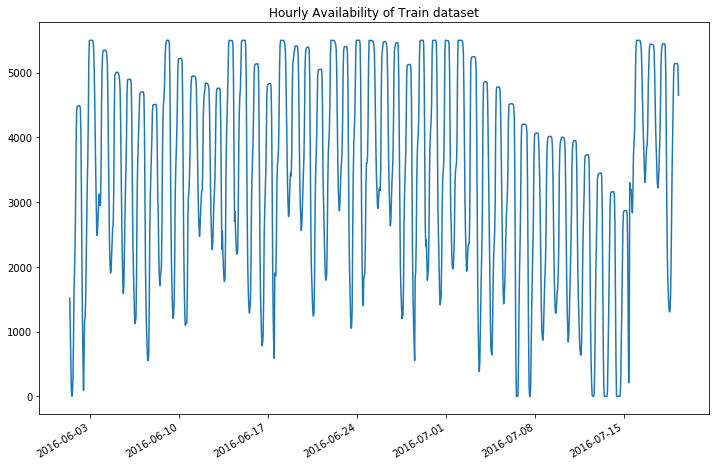

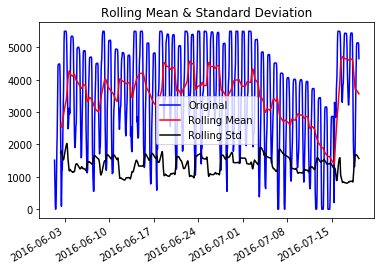

Results of Dickey-Fuller Test:
Test Statistic                   -3.148757
p-value                           0.023149
#Lags Used                       23.000000
Number of Observations Used    1126.000000
Critical Value (5%)              -2.864110
Critical Value (10%)             -2.568138
Critical Value (1%)              -3.436171
dtype: float64


Results of Dickey-Fuller Test:
Test Statistic                   -2.770297
p-value                           0.062643
#Lags Used                       21.000000
Number of Observations Used    1128.000000
Critical Value (5%)              -2.864106
Critical Value (10%)             -2.568136
Critical Value (1%)              -3.436160
dtype: float64
differentiated train data -
timestamp
2016-06-01 11:00:00   -0.404971
2016-06-01 12:00:00   -0.725805
2016-06-01 13:00:00   -1.641879
2016-06-01 14:00:00   -4.270093
2016-06-01 15:00:00    3.563936
2016-06-01 16:00:00    1.687052
2016-06-01 17:00:00    1.198916
2016-06-01 18:00:00    0.636234
2016-06-01 19:00:00    0.210467
2016-06-01 20:00:00    0.165902
2016-06-01 21:00:00    0.253155
2016-06-01 22:00:00    0.274410
2016-06-01 23:00:00    0.117989
2016-06-02 00:00:00    0.016621
2016-06-02 01:00:00    0.001229
2016-06-02 02:00:00    0.001283
2016-06-02 03:00:00    0.000669
2016-06-02 04:00:00   -0.000167
2016-06-02 05:00:00   -0.000056
2016-06

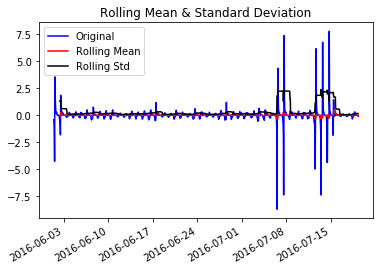

Results of Dickey-Fuller Test:
Test Statistic                -1.793904e+01
p-value                        2.865119e-30
#Lags Used                     2.100000e+01
Number of Observations Used    1.127000e+03
Critical Value (5%)           -2.864108e+00
Critical Value (10%)          -2.568137e+00
Critical Value (1%)           -3.436166e+00
dtype: float64


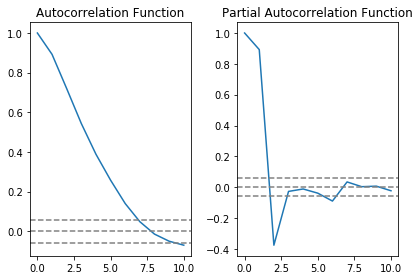

ARIMA aic -
2278.8658943535324
ARIMA fitted values -
timestamp
2016-06-01 11:00:00    0.000588
2016-06-01 12:00:00   -0.121743
2016-06-01 13:00:00   -0.203298
2016-06-01 14:00:00   -0.448649
2016-06-01 15:00:00   -1.172359
2016-06-01 16:00:00    1.515135
2016-06-01 17:00:00    0.784334
2016-06-01 18:00:00    0.324553
2016-06-01 19:00:00   -0.157838
2016-06-01 20:00:00    0.534968
2016-06-01 21:00:00    0.116172
2016-06-01 22:00:00   -0.007592
2016-06-01 23:00:00   -0.128918
2016-06-02 00:00:00   -0.255239
2016-06-02 01:00:00   -0.295401
2016-06-02 02:00:00   -0.285007
2016-06-02 03:00:00   -0.276798
2016-06-02 04:00:00   -0.285866
2016-06-02 05:00:00   -0.283441
2016-06-02 06:00:00   -0.269489
2016-06-02 07:00:00   -0.256954
2016-06-02 08:00:00   -0.259981
2016-06-02 09:00:00   -0.275199
2016-06-02 10:00:00   -0.273233
2016-06-02 11:00:00   -0.226135
2016-06-02 12:00:00   -0.190371
2016-06-02 13:00:00   -0.324369
2016-06-02 14:00:00    0.724044
2016-06-02 15:00:00    0.296219
2016-06-0

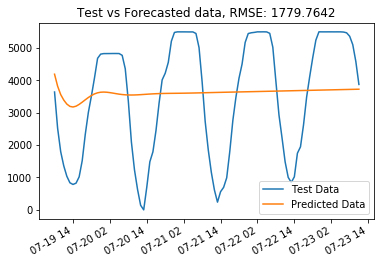

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from IPython.display import Image
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA, ARIMA
from sklearn.metrics import explained_variance_score

#read the dataset into pandas dataframe
cols = ['name','avl','timestamp']
df = pd.read_csv('D:\\AI_HAckathon\\KLCC_parking\\parking-2-klcc-2016-2017.csv',na_values ='OPEN',header=None,names=cols,parse_dates=['timestamp'])
df = df.set_index('timestamp')

# filling in NaN by interpolating
df.interpolate(inplace=True,method='time')

# groups the data in buckets by Hour and taking mean
df = df['avl'].resample('H').mean()

#creating train and test dataset
train=df[0:1150]
test_data=df[1150:1250]
print(train)

#plot train dataset
plt.figure(figsize=(12,8))
plt.plot(train.index, train, label='Train')
plt.title("Hourly Availability of Train dataset")
plt.gcf().autofmt_xdate()
plt.show()

#method to perform dickey-fuller test for stationary timeseries
def evaluate_stationarity(timeseries, t):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=t).mean()
    rolstd = timeseries.rolling(window=t).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.gcf().autofmt_xdate()
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
    'p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    return
    
#checking the stationarity of the train dataset
evaluate_stationarity(train, 24)
  
#log transform the Train data, to make the series stationary
train_log = np.log(train)

#checking the stationarity of the log-transformed train dataset
evaluate_stationarity(train_log, 24)
    
    
#eliminating Trend and Seasonality by first order differenting
#result of adfuller test shows improvement. Hence d should be 1 in ARIMA model params
data_diff = train_log - train_log.shift()
data_diff.dropna(inplace=True)
print("differentiated train data -")
print(data_diff)
evaluate_stationarity(data_diff,24)


#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log, nlags=10)
lag_pacf = pacf(train_log, nlags=10, method='ols')

#Plot ACF: showing that the p value should be 6 or 7
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF: showing the q value should be 1 or 2
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

#fit ARIMA model on log transformed train data, p = 6 , d = 1, q = 1
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order=(6,1,1))  
results_ARIMA = model.fit(disp=0)  
print("ARIMA aic -")
print(results_ARIMA.aic)

print("ARIMA fitted values -")
print(results_ARIMA.fittedvalues)

# This returns an array of future predictions for the same number of timesteps as in the Test data
future_forecast_ar = results_ARIMA.forecast(steps=test_data.size)
future_forecast = pd.Series(future_forecast_ar[0],copy=True,index = test_data.index)
print("future forecast in log scale -")
print(future_forecast)

#back to original scale
future_forecast_org = np.exp(future_forecast)
print("forecasted values in original scale -")
print(future_forecast_org)

plt.title('Test vs Forecasted data, RMSE: %.4f'% np.sqrt(sum((future_forecast_org-test_data)**2)/len(test_data)))
plt.plot(test_data,label='Test Data')
plt.plot(future_forecast_org, label='Predicted Data')
plt.legend(loc='best')
plt.gcf().autofmt_xdate()
plt.show()


16163.192190424626
predicted=4224.994116, expected=3640.750000
16180.80346180778
predicted=2783.763722, expected=2522.125000
16194.773821757324
predicted=1735.801307, expected=1798.250000
16207.887394721916
predicted=1388.010622, expected=1359.000000
16220.959608892477
predicted=1081.318501, expected=1037.500000
16234.045378781591
predicted=824.349289, expected=837.000000
16247.106822637003
predicted=720.882405, expected=785.250000
16260.220706221056
predicted=780.967688, expected=825.250000
16273.304606447047
predicted=867.748554, expected=1019.000000
16286.668145170272
predicted=1200.024125, expected=1519.000000
16301.088565214148
predicted=1956.801666, expected=2335.250000
16316.062321789344
predicted=2990.413028, expected=3011.500000
16329.125545685685
predicted=3429.647453, expected=3521.250000
16342.294282290299
predicted=3869.175876, expected=4080.250000
16355.947501038874
predicted=4509.554338, expected=4681.500000
16369.39940443218
predicted=5120.193250, expected=4811.000000
1

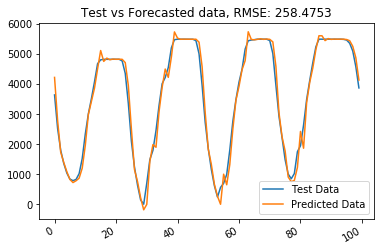

In [16]:
#rolling over prediction
train_1 = train.values
test_1 = test_data.values

history = [x for x in train_1]
predictions = list()
for t in range(len(test_1)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    print(model_fit.aic)
    yhat = output[0]
    predictions.append(yhat)
    obs = test_1[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predictions_se = pd.Series(predictions, copy=True)    
print("predictions_series-")
print(predictions_se)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_se-test_1)**2)/len(test_1)))


plt.title('Test vs Forecasted data, RMSE: %.4f'% np.sqrt(sum((predictions_se-test_1)**2)/len(test_1)))
plt.plot(test_1,label='Test Data')
plt.plot(predictions_se, label='Predicted Data')
plt.legend(loc='best')
plt.gcf().autofmt_xdate()
plt.show()